In [1]:
#  Objective: To predict Attrition in an orgnization based on different parameters
#  Dataset: Dataset consits of 1 target dependent variable "Attrition". Attrition is either Yes or NO.
#  Data Description: There are 10 variables influencing the 'Attrition'. They are as foolows:
#                 YrsExp, WorkChallenging, WorkEnvir, Compensation,
#                 TechExper, maritalstatus, education, children, ownhouse, loan
#                 Each variable is self explanatory. All the variables, except YearsOfExperience, are categorical.
#  Algorithm: In this execrice we are using Decision Tree supervised learning algorithm to predict 'Attrition' 
#  


In [2]:

from __future__ import absolute_import, division, print_function
import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re

##Load pandas and numpy library 
import pandas as pd
import numpy as np


## Loading plot libraries
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split

############# Load Decision Tree library
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

##Measuring Accuracy of the Model
#Import scikit-learn metrics module for accuracy calculation

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
    

# Step 1: Reading data

In [4]:
#Set the working directory where the dataset is stored before reading the dataset
data_dir = 'E:/Umesh-MAY2022/Personal-May2022/BA2ndEdition/2ndEdition/Book Chapters/Chapter 9 - Pred-Classification/Code/DecisionTree'
os.chdir(data_dir)
attrData_df = pd.read_csv("attrdataDecisionTree.csv")
attrData_df.head()

,Attrition,YrsExp,WorkChallenging,WorkEnvir,Compensation,TechExper,maritalstatus,education,children,ownhouse,loan
0,Yes,2.5,No,Low,Low,Excellent,married,undergraduate,no,no,no
1,No,2.0,Yes,Excellent,Excellent,Excellent,married,graduate,no,yes,yes
2,No,2.5,Yes,Excellent,Low,Excellent,single,graduate,no,yes,no
3,Yes,2.0,No,Excellent,Low,Excellent,married,graduate,no,yes,yes
4,No,2.0,Yes,Low,Low,Low,married,undergraduate,no,yes,no


In [6]:
##COpy data to another variable as abackup. 
X = attrData_df.copy()

In [7]:
X.head()

,Attrition,YrsExp,WorkChallenging,WorkEnvir,Compensation,TechExper,maritalstatus,education,children,ownhouse,loan
0,Yes,2.5,No,Low,Low,Excellent,married,undergraduate,no,no,no
1,No,2.0,Yes,Excellent,Excellent,Excellent,married,graduate,no,yes,yes
2,No,2.5,Yes,Excellent,Low,Excellent,single,graduate,no,yes,no
3,Yes,2.0,No,Excellent,Low,Excellent,married,graduate,no,yes,yes
4,No,2.0,Yes,Low,Low,Low,married,undergraduate,no,yes,no


# Step 2: Data exploration, data preparation

In [8]:
##Check the data types, missing values, etc

In [9]:
##Use LabeEncoder to code Target variable 'Attrition'
# Converting string labels into numbers.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X[['Attrition','WorkChallenging',
          'WorkEnvir','Compensation',
          'TechExper', 'maritalstatus','education',
           'children','ownhouse','loan']] = X[['Attrition','WorkChallenging',
          'WorkEnvir','Compensation',
          'TechExper', 'maritalstatus','education',
           'children','ownhouse','loan']].apply(encoder.fit_transform)

In [10]:
X.head()

,Attrition,YrsExp,WorkChallenging,WorkEnvir,Compensation,TechExper,maritalstatus,education,children,ownhouse,loan
0,1,2.5,0,1,1,0,1,1,0,0,0
1,0,2.0,1,0,0,0,1,0,0,1,1
2,0,2.5,1,0,1,0,2,0,0,1,0
3,1,2.0,0,0,1,0,1,0,0,1,1
4,0,2.0,1,1,1,1,1,1,0,1,0


In [11]:
#Check variable data types and convert to appropriate types
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Attrition        208 non-null    int32  
 1   YrsExp           208 non-null    float64
 2   WorkChallenging  208 non-null    int32  
 3   WorkEnvir        208 non-null    int32  
 4   Compensation     208 non-null    int32  
 5   TechExper        208 non-null    int32  
 6   maritalstatus    208 non-null    int32  
 7   education        208 non-null    int32  
 8   children         208 non-null    int32  
 9   ownhouse         208 non-null    int32  
 10  loan             208 non-null    int32  
dtypes: float64(1), int32(10)
memory usage: 9.9 KB


In [12]:
cat_vars = ['Attrition','WorkChallenging',
   'WorkEnvir','Compensation',
   'TechExper', 'maritalstatus','education',
   'children','ownhouse','loan']
for var in cat_vars:
    X[var] = X[var].astype('category',copy=False)

In [13]:
X.dtypes

Attrition          category
YrsExp              float64
WorkChallenging    category
WorkEnvir          category
Compensation       category
TechExper          category
maritalstatus      category
education          category
children           category
ownhouse           category
loan               category
dtype: object

In [14]:
##Check how the data is distributed. 

In [15]:
X.Attrition.value_counts()

1    112
0     96
Name: Attrition, dtype: int64

In [16]:
X.WorkChallenging.value_counts()

0    112
1     96
Name: WorkChallenging, dtype: int64

In [17]:
X.TechExper.value_counts()

0    176
1     32
Name: TechExper, dtype: int64

In [18]:
X.Compensation.value_counts()

1    124
0     84
Name: Compensation, dtype: int64

In [20]:
##Prepare data for the sklearn decisiontree function(). We need to separate X and Y parameters

In [21]:
X_NoAttrVar = X.drop(columns='Attrition')
Y = X['Attrition']

In [22]:
X_NoAttrVar.head(2)

,YrsExp,WorkChallenging,WorkEnvir,Compensation,TechExper,maritalstatus,education,children,ownhouse,loan
0,2.5,0,1,1,0,1,1,0,0,0
1,2.0,1,0,0,0,1,0,0,1,1


In [23]:
Y.head(2)

0    1
1    0
Name: Attrition, dtype: category
Categories (2, int64): [0, 1]

In [34]:
#Step 3: Split data into Train and Test

In [24]:
# Split dataset into training set and test set. We will use sklearn train_test_split() function
X_train, X_test, y_train, y_test = train_test_split(X_NoAttrVar, Y, train_size = 0.8,
                                    random_state=1) 
# 80% training and 20% test

In [25]:
X_train.shape

(166, 10)

In [26]:
y_train.shape

(166,)

In [27]:
X_test.shape

(42, 10)

In [28]:
y_test.shape

(42,)

# Creating DecisionTree Model

In [29]:
dec_model= DecisionTreeClassifier(random_state=10, 
                                  criterion="entropy", 
                                  max_depth=10)

In [30]:
dec_model_fit = dec_model.fit(X_train, y_train) ## Train the model

In [31]:
dec_model_fit

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=10)

In [32]:
dec_model_fit.get_n_leaves()

11

In [33]:
dec_model_fit.classes_

array([0, 1], dtype=int64)

Step 5: Test the model performance on new data

# Making Predictions

In [35]:
predicted = dec_model_fit.predict(X_test)

# Measuring Accuracy of the model

In [36]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        21

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



In [37]:
print(confusion_matrix(y_test, predicted))

[[21  0]
 [ 0 21]]


In [38]:
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 1.0


In [39]:
# Plot the tree structure of fully grown tree

In [40]:
from sklearn import tree

[Text(167.4, 199.32, 'X[1] <= 0.5\nentropy = 0.993\nsamples = 166\nvalue = [75, 91]'),
 Text(111.6, 163.07999999999998, 'X[2] <= 0.5\nentropy = 0.718\nsamples = 91\nvalue = [18, 73]'),
 Text(89.28, 126.83999999999999, 'X[5] <= 1.5\nentropy = 0.985\nsamples = 42\nvalue = [18, 24]'),
 Text(66.96000000000001, 90.6, 'X[0] <= 3.75\nentropy = 0.958\nsamples = 29\nvalue = [18, 11]'),
 Text(44.64, 54.359999999999985, 'X[4] <= 0.5\nentropy = 0.619\nsamples = 13\nvalue = [2, 11]'),
 Text(22.32, 18.119999999999976, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(66.96000000000001, 18.119999999999976, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(89.28, 54.359999999999985, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(111.6, 90.6, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(133.92000000000002, 126.83999999999999, 'entropy = 0.0\nsamples = 49\nvalue = [0, 49]'),
 Text(223.2, 163.07999999999998, 'X[2] <= 0.5\nentropy = 0.795\nsamples = 75\nvalue = [57, 18]'),
 Text(

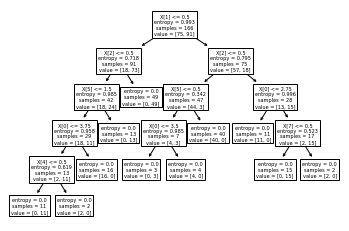

In [41]:
tree.plot_tree(dec_model_fit)

[Text(167.4, 199.32, 'WorkChallenging <= 0.5\nentropy = 0.993\nsamples = 166\nvalue = [75, 91]\nclass = No'),
 Text(111.6, 163.07999999999998, 'WorkEnvir <= 0.5\nentropy = 0.718\nsamples = 91\nvalue = [18, 73]\nclass = No'),
 Text(89.28, 126.83999999999999, 'maritalstatus <= 1.5\nentropy = 0.985\nsamples = 42\nvalue = [18, 24]\nclass = No'),
 Text(66.96000000000001, 90.6, 'YrsExp <= 3.75\nentropy = 0.958\nsamples = 29\nvalue = [18, 11]\nclass = yes'),
 Text(44.64, 54.359999999999985, 'TechExper <= 0.5\nentropy = 0.619\nsamples = 13\nvalue = [2, 11]\nclass = No'),
 Text(22.32, 18.119999999999976, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11]\nclass = No'),
 Text(66.96000000000001, 18.119999999999976, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = yes'),
 Text(89.28, 54.359999999999985, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]\nclass = yes'),
 Text(111.6, 90.6, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13]\nclass = No'),
 Text(133.92000000000002, 126.83999999999999, 'entropy =

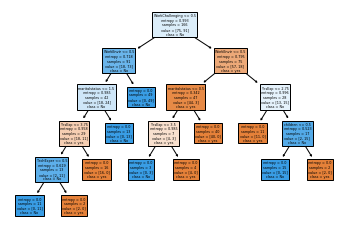

In [42]:
tree.plot_tree(decision_tree = dec_model_fit, 
               feature_names = X_train.columns,
              class_names = (['yes', 'No']),
               filled = True,
               impurity = True
              )

In [43]:
#Step 7: Improve performance of the tree by pruning the tree

# Creating a pruned Tree

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.91      1.00      0.95        21

    accuracy                           0.95        42
   macro avg       0.96      0.95      0.95        42
weighted avg       0.96      0.95      0.95        42

Accuracy: 0.9523809523809523


[Text(155.44285714285715, 195.696, 'WorkChallenging <= 0.5\nsamples = 166\nvalue = [75, 91]\nclass = No'),
 Text(95.65714285714286, 152.208, 'WorkEnvir <= 0.5\nsamples = 91\nvalue = [18, 73]\nclass = No'),
 Text(71.74285714285715, 108.72, 'maritalstatus <= 1.5\nsamples = 42\nvalue = [18, 24]\nclass = No'),
 Text(47.82857142857143, 65.232, 'YrsExp <= 3.75\nsamples = 29\nvalue = [18, 11]\nclass = yes'),
 Text(23.914285714285715, 21.744, 'samples = 13\nvalue = [2, 11]\nclass = No'),
 Text(71.74285714285715, 21.744, 'samples = 16\nvalue = [16, 0]\nclass = yes'),
 Text(95.65714285714286, 65.232, 'samples = 13\nvalue = [0, 13]\nclass = No'),
 Text(119.57142857142857, 108.72, 'samples = 49\nvalue = [0, 49]\nclass = No'),
 Text(215.22857142857143, 152.208, 'WorkEnvir <= 0.5\nsamples = 75\nvalue = [57, 18]\nclass = yes'),
 Text(167.4, 108.72, 'maritalstatus <= 0.5\nsamples = 47\nvalue = [44, 3]\nclass = yes'),
 Text(143.4857142857143, 65.232, 'YrsExp <= 3.5\nsamples = 7\nvalue = [4, 3]\nclass =

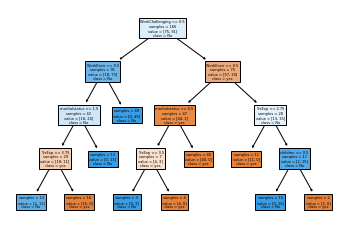

In [44]:
dec_model_2= DecisionTreeClassifier(random_state=0, 
                                  criterion="entropy", 
                                  max_depth=4)
dec_model_fit_2 = dec_model_2.fit(X_train, y_train) ## Train the model
##Predict Test Data
predicted_2 = dec_model_fit_2.predict(X_test)

##Performance of the model
print(classification_report(y_test, predicted_2))
print("Accuracy:",metrics.accuracy_score(y_test, predicted_2))

##Plot the tree
tree.plot_tree(decision_tree = dec_model_fit_2, 
               feature_names = X_train.columns,
               class_names = (['yes', 'No']),
               filled = True,
               impurity = False
              )


              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.90      0.90      0.90        21

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42

Accuracy: 0.9047619047619048


[Text(167.4, 190.26, 'WorkChallenging <= 0.5\nsamples = 166\nvalue = [75, 91]\nclass = No'),
 Text(83.7, 135.9, 'Compensation <= 0.5\nsamples = 91\nvalue = [18, 73]\nclass = No'),
 Text(41.85, 81.53999999999999, 'loan <= 0.5\nsamples = 20\nvalue = [13, 7]\nclass = yes'),
 Text(20.925, 27.180000000000007, 'samples = 16\nvalue = [13, 3]\nclass = yes'),
 Text(62.775000000000006, 27.180000000000007, 'samples = 4\nvalue = [0, 4]\nclass = No'),
 Text(125.55000000000001, 81.53999999999999, 'TechExper <= 0.5\nsamples = 71\nvalue = [5, 66]\nclass = No'),
 Text(104.625, 27.180000000000007, 'samples = 66\nvalue = [0, 66]\nclass = No'),
 Text(146.475, 27.180000000000007, 'samples = 5\nvalue = [5, 0]\nclass = yes'),
 Text(251.10000000000002, 135.9, 'WorkEnvir <= 0.5\nsamples = 75\nvalue = [57, 18]\nclass = yes'),
 Text(209.25, 81.53999999999999, 'maritalstatus <= 0.5\nsamples = 47\nvalue = [44, 3]\nclass = yes'),
 Text(188.32500000000002, 27.180000000000007, 'samples = 7\nvalue = [4, 3]\nclass = ye

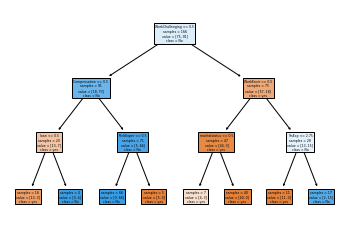

In [45]:
dec_model_3= DecisionTreeClassifier(random_state=0, 
                                  criterion="gini", 
                                  max_depth=3)
dec_model_fit_3 = dec_model_3.fit(X_train, y_train) ## Train the model
##Predict Test Data
predicted_3 = dec_model_fit_3.predict(X_test)

##Performance of the model
print(classification_report(y_test, predicted_3))
print("Accuracy:",metrics.accuracy_score(y_test, predicted_3))

##Plot the tree
tree.plot_tree(decision_tree = dec_model_fit_3, 
               feature_names = X_train.columns,
               class_names = (['yes', 'No']),
               filled = True,
               impurity = False
              )

Text(0.5, 1.0, 'Receiver Operating Characteristic')

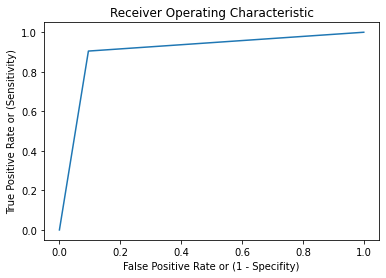

In [46]:
# Compute fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, predicted_3)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')

In [51]:
dec_model_fit_3.predict_proba(X_test)[:,1]

array([1.        , 0.        , 0.88235294, 1.        , 0.1875    ,
       0.88235294, 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.1875    , 0.42857143, 0.        ,
       1.        , 1.        , 0.88235294, 0.        , 0.        ,
       0.88235294, 0.1875    , 0.        , 0.        , 1.        ,
       1.        , 0.88235294, 1.        , 0.        , 0.        ,
       0.1875    , 1.        , 1.        , 1.        , 0.88235294,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.88235294])

In [53]:
roc_auc_score(y_test,dec_model_fit_3.predict_proba(X_test)[:,1])

0.9761904761904762